
## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">Data Analysis and Visualization with Python Part II</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">The Exploratory Data Analysis (EDA) Project</p>

<img src=https://i.ibb.co/wJW61Y2/Used-cars.jpg width="700" height="200">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">AutoScout Car Price Prediction EDA</p>



**The second part** is related to ``'Filling Data'``, in other words 'Imputation'. It deals with Missing Values. Categorical to numeric transformation, Encoding, is done as well.

# PART- 2 `( Handling With Missing Vales )`

In [1]:
# Import the libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
# !pip install termcolor
from termcolor import colored
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams

In [2]:
# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_rows', df.shape[0]+1)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [3]:
# Read data in json form
df0 = pd.read_csv('auto_scout_1.csv')
# Make a copy
df = df0.copy()

# Show some records
df.sample(2).T

,17510,14947
make_model,Toyota Paseo,Skoda Octavia
make,Toyota,Skoda
model,Paseo,Octavia
location,DE,DE
price,4500.0,32870.0
body_type,Convertible,Station wagon
type,Used,Employee's car
doors,2.0,5.0
country_version,NaN,Hungary
warranty,NaN,24


## Missing Values

In [4]:
from termcolor import cprint
def missing_values(df):
    cprint('Missing Value Information Per Column:\n', 'blue', attrs=['bold'])
    missing_count = df.isnull().sum().sort_values()
    missing_percent = (df.isnull().sum() / df.shape[0] * 100).sort_values()
    missing_values = pd.concat({'Missing_Count': missing_count, 'Missing_Percentage %' : missing_percent}, axis=1)
    return missing_values[missing_values['Missing_Count']>0]

In [5]:
missing_values(df)

Missing Value Information Per Column:



,Missing_Count,Missing_Percentage %
make_model,850,2.883311
make,850,2.883311
model,850,2.883311
location,850,2.883311
price,850,2.883311
body_type,850,2.883311
type,850,2.883311
seller,850,2.883311
mileage,851,2.886703
first_registration_year,852,2.890095


In [6]:
def show_nulls(data):
    '''
    This function plots missing values for each column by observation in the dataset.
    '''
    plt.figure(figsize=(10, 5))
    sns.displot(data=data.isnull().melt(value_name="missing"),
                y="variable",
                hue="missing",
                multiple="fill",
                height=9.25)
    plt.axvline(0.9, color="r")
    plt.show()

C:\Users\mathe\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x500 with 0 Axes>

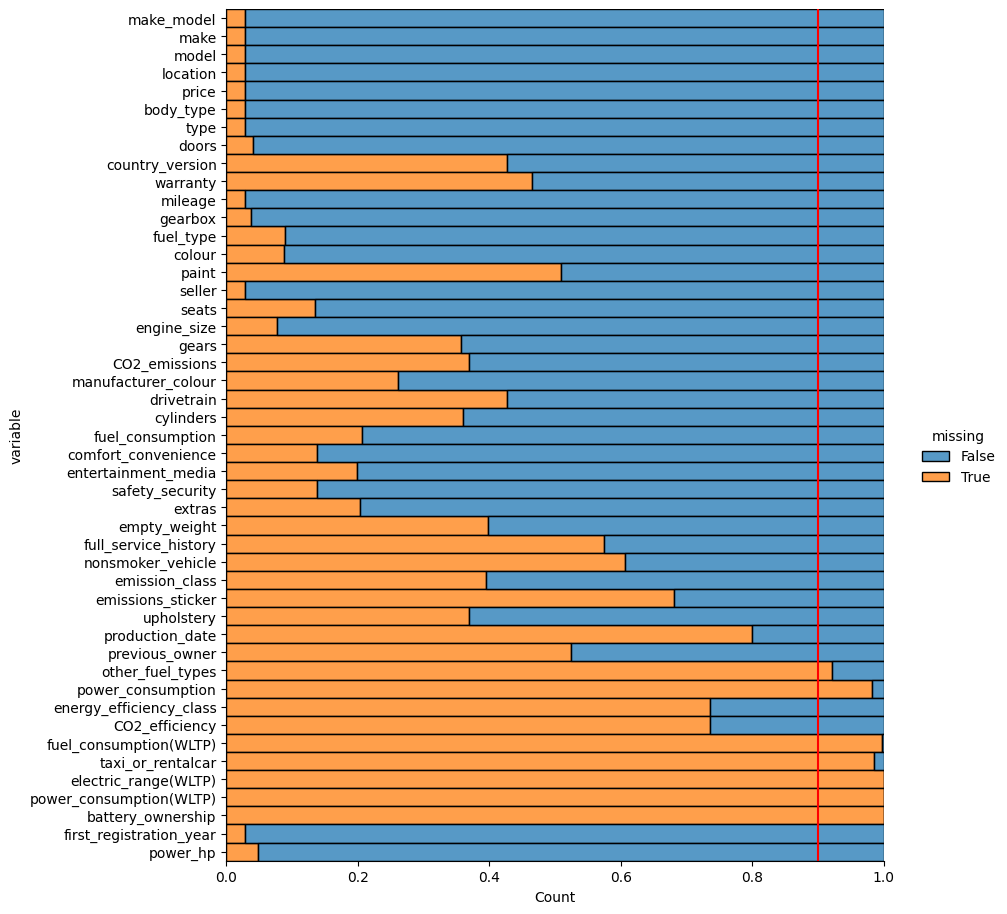

In [7]:
show_nulls(df)

#### make_model

In [8]:
df.make_model.isnull().sum()

850

In [9]:
df[df.isna().all(axis=1)]

,make_model,make,model,location,price,body_type,type,doors,country_version,warranty,mileage,gearbox,fuel_type,colour,paint,seller,seats,engine_size,gears,CO2_emissions,manufacturer_colour,drivetrain,cylinders,fuel_consumption,comfort_convenience,entertainment_media,safety_security,extras,empty_weight,full_service_history,nonsmoker_vehicle,emission_class,emissions_sticker,upholstery,production_date,previous_owner,other_fuel_types,power_consumption,energy_efficiency_class,CO2_efficiency,fuel_consumption(WLTP),taxi_or_rentalcar,electric_range(WLTP),power_consumption(WLTP),battery_ownership,first_registration_year,power_hp
1785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1814,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
(df[df.make_model.isnull()]).any(axis=1).value_counts()

False    850
Name: count, dtype: int64

##### drop the rows that all features are NaN

In [11]:
df.dropna(how = "all", inplace = True)

In [12]:
df.make_model.isnull().sum()

0

#### make

In [13]:
df.make.isnull().sum()

0

#### model

In [14]:
df.model.isnull().sum()

0

#### location

In [15]:
df.location.isnull().sum()

0

#### price

In [16]:
df.price.isnull().sum()

0

#### body_type

In [17]:
df.body_type.isnull().sum()

0

#### type

In [18]:
df.type.isnull().sum()

0

#### doors

In [19]:
df.doors.isnull().sum()

359

In [20]:
for group in list(df['make_model'].unique()):
    cond = df['make_model'] == group
    mode = list(df[cond]['doors'].mode())
    if mode != []:
        df.loc[cond, 'doors'] = df.loc[cond, 'doors'].fillna(df[cond]['doors'].mode()[0])
    else:
        df.loc[cond, 'doors'] = df.loc[cond, 'doors'].fillna(df['doors'].mode()[0])

In [21]:
df.doors.isnull().sum()

0

#### country_version

In [22]:
df.country_version.isnull().sum()

11741

In [23]:
for group in list(df['make_model'].unique()):
    cond = df['make_model'] == group
    mode = list(df[cond]['country_version'].mode())
    if mode != []:
        df.loc[cond, 'country_version'] = df.loc[cond, 'country_version'].fillna(df[cond]['country_version'].mode()[0])
    else:
        df.loc[cond, 'country_version'] = df.loc[cond, 'country_version'].fillna(df['country_version'].mode()[0])

#### warranty
**Important:** There is 'Yes'
null No=0

In [24]:
df.warranty.value_counts(dropna=False)

warranty
NaN    12846
12      9545
Yes     2319
24      1515
60       968
       ...  
55         1
99         1
122        1
44         1
4          1
Name: count, Length: 66, dtype: int64

In [25]:
df.warranty = df.warranty.apply(lambda x: 'No' if pd.isna(x) or x == 0 else 'Yes')

#### mileage

In [26]:
df.mileage.isnull().sum()

1

In [27]:
for group in list(df['make_model'].unique()):
    cond = df['make_model'] == group
    mode = list(df[cond]['country_version'].mode())
    if mode != []:
        df.loc[cond, 'mileage'] = df.loc[cond, 'mileage'].fillna(df[cond]['mileage'].mode()[0])
    else:
        df.loc[cond, 'mileage'] = df.loc[cond, 'mileage'].fillna(df['mileage'].mode()[0])

#### first_registration

In [28]:
df.first_registration_year.unique()

array(['2016-01-01', '2022-01-01', '2020-01-01', '2015-01-01',
       '2005-01-01', '2018-01-01', '2019-01-01', '2013-01-01',
       '2010-01-01', '2021-01-01', '2014-01-01', '2017-01-01',
       '2011-01-01', '2006-01-01', '2012-01-01', '2008-01-01',
       '1986-01-01', '1985-01-01', '2007-01-01', '2004-01-01',
       '2009-01-01', '1998-01-01', '1993-01-01', '1991-01-01',
       '1966-01-01', '2002-01-01', '1983-01-01', '1988-01-01',
       '1987-01-01', '1999-01-01', '1979-01-01', '1984-01-01',
       '2003-01-01', '2000-01-01', '1995-01-01', '1977-01-01',
       '1963-01-01', '1997-01-01', '1992-01-01', '1981-01-01', nan,
       '1994-01-01', '2001-01-01', '1957-01-01', '1996-01-01',
       '1973-01-01', '1952-01-01', '1962-01-01', '1958-01-01',
       '1978-01-01', '1972-01-01', '1990-01-01', '1969-01-01',
       '1970-01-01', '1971-01-01', '1964-01-01', '1976-01-01',
       '1968-01-01', '1982-01-01', '1980-01-01', '1967-01-01',
       '1950-01-01', '1975-01-01', '1989-01-01', '

In [29]:
fixed_date = pd.to_datetime('2022-01-01')

In [30]:
df['first_registration_year'] = pd.to_datetime(df['first_registration_year'], format='%Y-%m-%d')

# Calculate the age of the vehicle
df['age'] = fixed_date.year - df['first_registration_year'].dt.year

In [31]:
df['age'].value_counts(dropna=False)

age
 3.0      3667
 4.0      3492
 0.0      3086
 1.0      2870
 2.0      2473
          ... 
-1.0         1
 93.0        1
 72.0        1
 94.0        1
-180.0       1
Name: count, Length: 84, dtype: int64

In [32]:
df['age'].isnull().sum()

2

In [33]:
for group in list(df['make_model'].unique()):
    cond = df['make_model'] == group
    mode = list(df[cond]['age'].mode())
    if mode != []:
        df.loc[cond, 'age'] = df.loc[cond, 'age'].fillna(df[cond]['age'].mode()[0])
    else:
        df.loc[cond, 'age'] = df.loc[cond, 'age'].fillna(df['age'].mode()[0])

In [34]:
df.drop('first_registration_year', axis=1, inplace=True)

#### gearbox

In [35]:
df.gearbox.isnull().sum()

248

In [36]:
for group in list(df['make_model'].unique()):
    cond = df['make_model'] == group
    mode = list(df[cond]['gearbox'].mode())
    if mode != []:
        df.loc[cond, 'gearbox'] = df.loc[cond, 'gearbox'].fillna(df[cond]['gearbox'].mode()[0])
    else:
        df.loc[cond, 'gearbox'] = df.loc[cond, 'gearbox'].fillna(df['gearbox'].mode()[0])

#### fuel_type

In [37]:
df[df.make_model=='Volvo 960'].fuel_type.value_counts()

fuel_type
Gasoline    4
Name: count, dtype: int64

In [38]:
df.fuel_type.isnull().sum()

1787

In [39]:
df[df.fuel_type.isnull()]['other_fuel_types'].value_counts()

other_fuel_types
Electricity    1767
Hydogen          10
Name: count, dtype: int64

In [40]:
df['fuel_type'] = df['fuel_type'].fillna(df['other_fuel_types'])

In [41]:
df['fuel_type'] = df.fuel_type.str.replace('Hydogen', 'Hydrogen')

In [42]:
for group in list(df['make_model'].unique()):
    cond = df['make_model'] == group
    mode = list(df[cond]['fuel_type'].mode())
    if mode != []:
        df.loc[cond, 'fuel_type'] = df.loc[cond, 'fuel_type'].fillna(df[cond]['fuel_type'].mode()[0])
    else:
        df.loc[cond, 'fuel_type'] = df.loc[cond, 'fuel_type'].fillna(df['fuel_type'].mode()[0])

In [43]:
diesel = ['Diesel', 'Diesel (Particle filter)']

benzine = ['Gasoline', 'Super 95', 'Regular/Benzine 91', 'Super E10 95', 'Regular/Benzine 91 (Particle filter)', 
           'Regular/Benzine 91 (Particle filter)','Super 95 (Particle filter)', 'Super E10 95 (Particle filter)',
           'Regular/Benzine E10 91','Others', 'Gasoline (Particle filter)', 'Super Plus 98', 'Super Plus E10 98',
          'Super Plus E10 98 (Particle filter)', 'Others (Particle filter)', 'Super Plus 98 (Particle filter)',
          'Regular/Benzine E10 91 (Particle filter)', 'Ethanol','Super 95 (Particle filter) / Super E10 95 / Ethanol',
          ]

lpg_cng = ['Liquid petroleum gas (LPG)', 'LPG', 'CNG', 'Domestic gas H', 'Domestic gas L', 'CNG (Particle filter)', 
       'LPG (Particle filter)', 'Domestic gas L (Particle filter)', 'Liquid petroleum gas (LPG) (Particle filter)',
       'Biogas','Liquid petroleum gas (LPG) (Particle filter) / Super 95 / Super E10 95',
              'Liquid petroleum gas (LPG) / Super 95 / Super Plus 98 / Super Plus E10 98 / Super E10 95',
              'Liquid petroleum gas (LPG) / Super 95 / Super E10 95', 'Liquid petroleum gas (LPG) / Super 95',
              'Liquid petroleum gas (LPG) / Super 95 / Super E10 95 / Super Plus 98',
              'Liquid petroleum gas (LPG) / Super 95 / Super Plus 98',
              'Liquid petroleum gas (LPG) / Super E10 95 / Super Plus E10 98 / Super Plus 98 / Super 95',
              'Liquid petroleum gas (LPG) / Super E10 95', 'Super 95 / Super Plus 98 / Liquid petroleum gas (LPG)',
              'Domestic gas L / Super 95 / Domestic gas H',
              'Domestic gas H / Super E10 95 / Super Plus E10 98 / Super 95 / Super Plus 98 / Domestic gas L',
              'Liquid petroleum gas (LPG) / Super E10 95 / Regular/Benzine 91 / Super 95 / Super Plus 98 / Biogas',
              'Super 95 / Liquid petroleum gas (LPG)']
electric = ['Electric (Particle filter)', 'Electric', 'Electricity']

In [44]:
def fuel_category(x):
    if x in diesel:
        return 'diesel'
    elif x in benzine:
        return 'benzine'
    elif x in lpg_cng:
        return 'lpg/cng'
    elif x in electric:
        return 'electric'
    else:
        return x

In [45]:
df['fuel_type'] = df['fuel_type'].apply(fuel_category)

In [46]:
df['fuel_type'].value_counts(dropna=False)

fuel_type
benzine     17552
diesel       8730
electric     1957
lpg/cng       378
Hydrogen       13
Name: count, dtype: int64

#### colour

In [47]:
df.colour.isnull().sum()

1724

In [48]:
color_translations = {
    'Blau': 'Blue',
    'Rot': 'Red',
    'Grün': 'Green',
    'Silber': 'Silver',
    'Schwarz': 'Black',
    'Weiß': 'White',
    'Grau': 'Grey',
    'Braun': 'Brown',
    'Beige': 'Beige',
    'Orange': 'Orange',
    'Blu': 'Blue',
    'Rosso': 'Red',
    'Verde': 'Green',
    'Argento': 'Silver',
    'Nero': 'Black',
    'Bianco': 'White',
    'Grigio': 'Grey',
    'Marrone': 'Brown',
    'Beige': 'Beige',
    'Arancione': 'Orange',
    'Blauw': 'Blue',
    'Rood': 'Red',
    'Groen': 'Green',
    'Zilver': 'Silver',
    'Zwart': 'Black',
    'Wit': 'White',
    'Grijs': 'Grey',
    'Bruin': 'Brown',
    'Beige': 'Beige',
    'Oranje': 'Orange',
    'Bleu': 'Blue',
    'Rouge': 'Red',
    'Vert': 'Green',
    'Argent': 'Silver',
    'Noir': 'Black',
    'Blanc': 'White',
    'Gris': 'Gray',
    'Marron': 'Brown',
    'Beige': 'Beige',
    'Orange': 'Orange',
    'Azul': 'Blue',
    'Rojo': 'Red',
    'Verde': 'Green',
    'Plata': 'Silver',
    'Negro': 'Black',
    'Blanco': 'White',
    'Gris': 'Grey',
    'Marrón': 'Brown',
    'Beige': 'Beige',
    'Naranja': 'Orange',
    'Blue': 'Blue',
    'Red': 'Red',
    'Green': 'Green',
    'Silver': 'Silver',
    'Black': 'Black',
    'White': 'White',
    'Gray': 'Grey',
    'Grey': 'Grey',
    'Brown': 'Brown',
    'Beige': 'Beige',
    'Orange': 'Orange',
}
def translate_color(x):
    if isinstance(x, str):
        for color, translation in color_translations.items():
            if color in x:
                return translation
    return None

In [49]:
# Apply the custom function to create a new column 'translated_color'
df['translated_color'] = df['manufacturer_colour'].apply(translate_color)
# Check the updated DataFrame
df['translated_color'].value_counts(dropna=False)

translated_color
None      15564
Black      3163
Grey       3152
White      2638
Blue       1765
Red        1123
Silver      540
Brown       237
Green       166
Orange      149
Beige       133
Name: count, dtype: int64

In [50]:
df['colour'].value_counts(dropna=False)

colour
Black     6473
Grey      5998
White     5185
Blue      3478
Red       2242
NaN       1724
Silver    1622
Green      450
Brown      437
Orange     288
Beige      278
Yellow     230
Violet      98
Bronze      65
Gold        62
Name: count, dtype: int64

In [51]:
df['colour'] = df['colour'].fillna(df['translated_color'])

In [52]:
df.drop('translated_color',axis=1, inplace=True)

In [53]:
for group in list(df['make_model'].unique()):
    cond = df['make_model'] == group
    mode = list(df[cond]['colour'].mode())
    if mode != []:
        df.loc[cond, 'colour'] = df.loc[cond, 'colour'].fillna(df[cond]['colour'].mode()[0])
    else:
        df.loc[cond, 'colour'] = df.loc[cond, 'colour'].fillna(df['colour'].mode()[0])

In [54]:
df['colour'].isnull().sum()

0

#### paint

In [55]:
df.paint.isnull().sum()

14135

In [56]:
df.paint.value_counts(dropna=False)

paint
Metallic     14494
NaN          14135
Uni/basic        1
Name: count, dtype: int64

In [57]:
df[df.paint.isnull()]['manufacturer_colour'].value_counts()

manufacturer_colour
Blanco             1234
Gris                655
Azul                551
Negro               542
Rojo                380
                   ... 
Alor blau             1
Magnetic-Grau         1
Midnight schwar       1
Blau Med              1
DEMIN BLUE            1
Name: count, Length: 1931, dtype: int64

In [58]:
df['manufacturer_colour'] = df['manufacturer_colour'].str.lower()

def fill_paint(row):
    if pd.notna(row['manufacturer_colour']) and 'metallic' in row['manufacturer_colour']:
        return 'Metallic'
    else:
        return 'Nonmetallic'


df['paint'].fillna(df.apply(fill_paint, axis=1), inplace=True)


df['paint'] = df['paint'].str.title()

In [59]:
df.paint.value_counts(dropna=False)

paint
Metallic       14604
Nonmetallic    14025
Uni/Basic          1
Name: count, dtype: int64

#### seller

In [60]:
df.seller.isnull().sum()

0

#### seats

In [61]:
df.seats.isnull().sum()

3125

In [62]:
for group in list(df['make_model'].unique()):
    cond = df['make_model'] == group
    mode = list(df[cond]['seats'].mode())
    if mode != []:
        df.loc[cond, 'seats'] = df.loc[cond, 'seats'].fillna(df[cond]['seats'].mode()[0])
    else:
        df.loc[cond, 'seats'] = df.loc[cond, 'seats'].fillna(df['seats'].mode()[0])

#### power

In [63]:
df.power_hp.isnull().sum()

572

In [64]:
for group in list(df['make_model'].unique()):
    cond = df['make_model'] == group
    mode = list(df[cond]['power_hp'].mode())
    if mode != []:
        df.loc[cond, 'power_hp'] = df.loc[cond, 'power_hp'].fillna(df[cond]['power_hp'].mode()[0])
    else:
        df.loc[cond, 'power_hp'] = df.loc[cond, 'power_hp'].fillna(df['power_hp'].mode()[0])

#### engine_size

In [65]:
df.engine_size.isnull().sum()

1403

In [66]:
for group in list(df['make_model'].unique()):
    cond = df['make_model'] == group
    mode = list(df[cond]['engine_size'].mode())
    if mode != []:
        df.loc[cond, 'engine_size'] = df.loc[cond, 'engine_size'].fillna(df[cond]['engine_size'].mode()[0])
    else:
        df.loc[cond, 'engine_size'] = df.loc[cond, 'engine_size'].fillna(df['engine_size'].mode()[0])

#### gears

In [67]:
df.gears.isnull().sum()

9676

In [68]:
for group in list(df['make_model'].unique()):
    cond = df['make_model'] == group
    mode = list(df[cond]['gears'].mode())
    if mode != []:
        df.loc[cond, 'gears'] = df.loc[cond, 'gears'].fillna(df[cond]['gears'].mode()[0])
    else:
        df.loc[cond, 'gears'] = df.loc[cond, 'gears'].fillna(df['gears'].mode()[0])

#### CO2_emissions

In [69]:
df.CO2_emissions.isnull().sum()

10036

In [70]:
df['CO2_emissions'].fillna(df.groupby(["make_model", "body_type", "fuel_type"])["CO2_emissions"].transform("median"), inplace=True)

In [71]:
df['CO2_emissions'].fillna(df.groupby(["make_model", "body_type"])["CO2_emissions"].transform("median"), inplace=True)

In [72]:
df['CO2_emissions'].fillna(df.groupby("make_model")["CO2_emissions"].transform("median"), inplace=True)

In [73]:
df['CO2_emissions'].fillna(df["CO2_emissions"].median(), inplace = True)

#### drivetrain

In [74]:
df.drivetrain.isnull().sum()

11737

In [75]:
for group in list(df['make_model'].unique()):
    cond = df['make_model'] == group
    mode = list(df[cond]['drivetrain'].mode())
    if mode != []:
        df.loc[cond, 'drivetrain'] = df.loc[cond, 'drivetrain'].fillna(df[cond]['drivetrain'].mode()[0])
    else:
        df.loc[cond, 'drivetrain'] = df.loc[cond, 'drivetrain'].fillna(df['drivetrain'].mode()[0])

#### cylinders

In [76]:
df.cylinders.isnull().sum()

9778

In [77]:
for group in list(df['make_model'].unique()):
    cond = df['make_model'] == group
    mode = list(df[cond]['cylinders'].mode())
    if mode != []:
        df.loc[cond, 'cylinders'] = df.loc[cond, 'cylinders'].fillna(df[cond]['cylinders'].mode()[0])
    else:
        df.loc[cond, 'cylinders'] = df.loc[cond, 'cylinders'].fillna(df['cylinders'].mode()[0])

#### manufacturer_colour

In [78]:
df.manufacturer_colour.isnull().sum()

6843

In [79]:
df.drop('manufacturer_colour',axis=1, inplace=True)

#### fuel_consumption

In [80]:
df.fuel_consumption.isnull().sum()

5245

In [81]:
df[df.fuel_consumption.isnull()].head(2)

,make_model,make,model,location,price,body_type,type,doors,country_version,warranty,mileage,gearbox,fuel_type,colour,paint,seller,seats,engine_size,gears,CO2_emissions,drivetrain,cylinders,fuel_consumption,comfort_convenience,entertainment_media,safety_security,extras,empty_weight,full_service_history,nonsmoker_vehicle,emission_class,emissions_sticker,upholstery,production_date,previous_owner,other_fuel_types,power_consumption,energy_efficiency_class,CO2_efficiency,fuel_consumption(WLTP),taxi_or_rentalcar,electric_range(WLTP),power_consumption(WLTP),battery_ownership,power_hp,age
0,Mercedes-Benz A 160,Mercedes-Benz,A 160,ES,16950.0,Compact,Used,5.0,Spain,Yes,120200.0,Manual,diesel,Black,Metallic,Dealer,5.0,1595.0,5.0,98.0,Front,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.0,6.0
1,Mercedes-Benz EQE 350,Mercedes-Benz,EQE 350,ES,80900.0,Compact,Pre-registered,4.0,Spain,Yes,5000.0,Automatic,electric,Black,Nonmetallic,Dealer,5.0,1.0,9.0,0.0,4WD,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,292.0,0.0


In [82]:
df['fuel_consumption'] = df['fuel_consumption'].fillna(df['fuel_consumption(WLTP)'])

In [83]:
df.fuel_consumption.isnull().sum()

5145

In [84]:
for group in list(df['make_model'].unique()):
    cond = df['make_model'] == group
    mode = list(df[cond]['fuel_consumption'].mode())
    if mode != []:
        df.loc[cond, 'fuel_consumption'] = df.loc[cond, 'fuel_consumption'].fillna(df[cond]['fuel_consumption'].mode()[0])
    else:
        df.loc[cond, 'fuel_consumption'] = df.loc[cond, 'fuel_consumption'].fillna(df['fuel_consumption'].mode()[0])

#### comfort_convenience

In [85]:
df.comfort_convenience.isnull().sum()

3197

In [86]:
for group in list(df['make_model'].unique()):
    cond = df['make_model'] == group
    mode = list(df[cond]['comfort_convenience'].mode())
    if mode != []:
        df.loc[cond, 'comfort_convenience'] = df.loc[cond, 'comfort_convenience'].fillna(df[cond]['comfort_convenience'].mode()[0])
    else:
        df.loc[cond, 'comfort_convenience'] = df.loc[cond, 'comfort_convenience'].fillna(df['comfort_convenience'].mode()[0])

In [87]:
df.comfort_convenience.sample(5)

13456    ['Air conditioning, Armrest, Automatic climate...
10578    ['Air conditioning, Power windows, Tinted wind...
28844    ['Cruise control, Electric tailgate, Electrica...
12213    ['Air conditioning, Electrical side mirrors, H...
909                     ['Cruise control, Tinted windows']
Name: comfort_convenience, dtype: object

In [88]:
base = [
    "Power windows",
    "Air conditioning",
    "Electrical side mirrors"
]

standard = [
    "Multi-function steering wheel",
    "Automatic climate control",
    "Cruise control",
    "Leather steering wheel",
    "Parking assist system sensors rear",
    "Rain sensor",
    "Light sensor",
    "Seat heating",
    "Start-stop system",
    "Armrest"

]

mid_range = [
    "Parking assist system camera",
    "Parking assist system sensors front",
    "Lumbar support",
    "Tinted windows",
    "Keyless central door lock",
    "Split rear seats",
    "Electrically adjustable seats",
    "2 zones",
    "Heated steering wheel",
    "Electric tailgate",
    "Hill Holder",
    "Navigation system",
    "Parking assist system self-steering"

]

top = [
    "Auxiliary heating",
    "Heads-up display",
    "360° camera",
    "Seat ventilation",
    "Air conditioning (dual-zone or multi-zone)",
    "Fold flat passenger seat",
    "Air suspension",
    "Wind deflector",
    "Massage seats",
    "Electric backseat adjustment",
    "3 zones",
    "4 zones",
    "Sliding door right",
    "Sliding door left",
    "Leather seats",
    "Park Distance Control",
    "Sunroof",
    "Panorama roof",
    "Electrically heated windshield"
]

In [89]:
def assign_car_class(equipment_features):
    # Convert the string representation of list to an actual list
    equipment_features = eval(equipment_features)
    
    if isinstance(equipment_features, list):
        if any(feature in equipment_features for feature in top):
            return "Top"
        elif any(feature in equipment_features for feature in mid_range):
            return "Mid-range"
        elif any(feature in equipment_features for feature in standard):
            return "Standard"
    return "Basic"

In [90]:
df['comfort_convenience'] = df['comfort_convenience'].apply(assign_car_class)

In [91]:
df['comfort_convenience'].value_counts(dropna=False)

comfort_convenience
Basic        28291
Standard       197
Mid-range      108
Top             34
Name: count, dtype: int64

#### entertainment_media

In [92]:
df.entertainment_media.isnull().sum()

4986

In [93]:
for group in list(df['make_model'].unique()):
    cond = df['make_model'] == group
    mode = list(df[cond]['entertainment_media'].mode())
    if mode != []:
        df.loc[cond, 'entertainment_media'] = df.loc[cond, 'entertainment_media'].fillna(df[cond]['entertainment_media'].mode()[0])
    else:
        df.loc[cond, 'entertainment_media'] = df.loc[cond, 'entertainment_media'].fillna(df['entertainment_media'].mode()[0])

In [94]:
df['entertainment_media'].apply(eval).str[0].str.split(',').explode().value_counts()

entertainment_media
 Radio                                 19316
 On-board computer                     19030
 USB                                   16571
 Hands-free equipment                  14722
Bluetooth                              12754
 MP3                                   10622
 Digital radio                          9468
 Bluetooth                              7885
Android Auto                            7761
 Apple CarPlay                          7585
 Sound system                           7133
 CD player                              6110
 Digital cockpit                        3971
CD player                               3645
 Integrated music streaming             3499
 WLAN / WiFi hotspot                    2369
 Induction charging for smartphones     2186
On-board computer                       1751
Radio                                    797
Apple CarPlay                            441
Hands-free equipment                     429
Digital radio                      

In [95]:
base = ['Radio',  'CD player']
standard = ['On-board computer', 'Hands-free equipment', 'Bluetooth', 'Digital radio', 'USB', 'MP3']
mid_range = ['Android Auto', 'Apple CarPlay', 'Sound system', 'Digital cockpit']
top = ['Integrated music streaming', 'WLAN / WiFi hotspot', 'Induction charging for smartphones', 'Television']

In [96]:
def assign_car_class(equipment_features):
    # Convert the string representation of list to an actual list
    equipment_features = eval(equipment_features)
    
    if isinstance(equipment_features, list):
        if any(feature in equipment_features for feature in top):
            return "Top"
        elif any(feature in equipment_features for feature in mid_range):
            return "Mid-range"
    return "Standard"

In [97]:
df['entertainment_media'] = df['entertainment_media'].apply(assign_car_class)

#### safety_security

In [98]:
df.safety_security.isnull().sum()

3215

In [99]:
for group in list(df['make_model'].unique()):
    cond = df['make_model'] == group
    mode = list(df[cond]['safety_security'].mode())
    if mode != []:
        df.loc[cond, 'safety_security'] = df.loc[cond, 'safety_security'].fillna(df[cond]['safety_security'].mode()[0])
    else:
        df.loc[cond, 'safety_security'] = df.loc[cond, 'safety_security'].fillna(df['safety_security'].mode()[0])

In [100]:
df['safety_security'].apply(eval).str[0].str.split(',').explode().value_counts()

safety_security
ABS                                25934
 Power steering                    24154
 Driver-side airbag                23891
 Side airbag                       23209
 Passenger-side airbag             22857
                                   ...  
Passenger-side airbag                  3
Xenon headlights                       2
Tire pressure monitoring system        2
Lane departure warning system          1
High beam assist                       1
Name: count, Length: 66, dtype: int64

In [101]:
def count_unique(lst):
    return len(set(lst))

In [102]:
df['safety_security'] = df['safety_security'].apply(lambda x: count_unique(x.split(','))).astype(float)

#### extras

In [103]:
df.extras.isnull().sum()

5150

In [104]:
for group in list(df['make_model'].unique()):
    cond = df['make_model'] == group
    mode = list(df[cond]['extras'].mode())
    if mode != []:
        df.loc[cond, 'extras'] = df.loc[cond, 'extras'].fillna(df[cond]['extras'].mode()[0])
    else:
        df.loc[cond, 'extras'] = df.loc[cond, 'extras'].fillna(df['extras'].mode()[0])

In [105]:
df['extras'].sample(1)

24237    ['Alloy wheels, Automatically dimming interior...
Name: extras, dtype: object

In [106]:
df['extras'] = df['extras'].apply(lambda x: len(x.split(',')) if x != 'nan' else 0).astype(float)

In [107]:
df['extras'].value_counts(dropna=False)

extras
1.0     8983
2.0     3465
3.0     3010
4.0     2472
5.0     2127
6.0     1629
7.0     1522
8.0     1157
9.0     1057
10.0     884
11.0     672
12.0     568
13.0     390
14.0     275
15.0     211
16.0     110
17.0      56
18.0      27
19.0      10
20.0       3
26.0       2
Name: count, dtype: int64

#### empty_weight

In [108]:
df.empty_weight.isnull().sum()

10872

In [109]:
for group in list(df['make_model'].unique()):
    cond = df['make_model'] == group
    mode = list(df[cond]['empty_weight'].mode())
    if mode != []:
        df.loc[cond, 'empty_weight'] = df.loc[cond, 'empty_weight'].fillna(df[cond]['empty_weight'].mode()[0])
    else:
        df.loc[cond, 'empty_weight'] = df.loc[cond, 'empty_weight'].fillna(df['empty_weight'].mode()[0])

#### full_service_history

In [110]:
df.full_service_history.isnull().sum()

16065

In [111]:
df.full_service_history.fillna('No', inplace=True)

#### nonsmoker_vehicle

In [112]:
df.nonsmoker_vehicle.isnull().sum()

17036

In [113]:
df.nonsmoker_vehicle.fillna('No', inplace=True)

#### emission_class
Categorize Euro 6, Euro 6d-TEMP, Euro 6d, Euro 6c  as 6

In [114]:
df.emission_class.isnull().sum()

10771

In [115]:
for group in list(df['make_model'].unique()):
    cond = df['make_model'] == group
    mode = list(df[cond]['emission_class'].mode())
    if mode != []:
        df.loc[cond, 'emission_class'] = df.loc[cond, 'emission_class'].fillna(df[cond]['emission_class'].mode()[0])
    else:
        df.loc[cond, 'emission_class'] = df.loc[cond, 'emission_class'].fillna(df['emission_class'].mode()[0])

In [116]:
df['emission_class']= df['emission_class'].str.extract('(\d)').astype(float)
df['emission_class'].value_counts(dropna=False)

emission_class
6.0    21514
5.0     3002
4.0     2565
3.0      763
2.0      405
1.0      381
Name: count, dtype: int64

#### emissions_sticker
* 4 (Green)          
* 1 (No sticker)      
* 3 (Yellow)            
* 2 (Red) 

In [117]:
df.emissions_sticker.isnull().sum()

19216

In [118]:
df.drop('emissions_sticker', axis=1, inplace=True)

#### upholstery

In [119]:
df.upholstery.isnull().sum()

10020

In [120]:
for group in list(df['make_model'].unique()):
    cond = df['make_model'] == group
    mode = list(df[cond]['upholstery'].mode())
    if mode != []:
        df.loc[cond, 'upholstery'] = df.loc[cond, 'upholstery'].fillna(df[cond]['upholstery'].mode()[0])
    else:
        df.loc[cond, 'upholstery'] = df.loc[cond, 'upholstery'].fillna(df['upholstery'].mode()[0])

#### production_date

In [121]:
df.production_date.isnull().sum()

22722

In [122]:
df.drop('production_date', axis=1, inplace=True)

#### previous_owner
tarihlere bak nan 0 yapilabilir


In [123]:
df.previous_owner.isnull().sum()

14615

In [124]:
for group in list(df['age'].unique()):
    cond = df['age']==group
    df.loc[cond,'previous_owner'] = df.loc[cond, 'previous_owner'].fillna(method='ffill').fillna(method='bfill')
df['previous_owner'] = df['previous_owner'].fillna(method='ffill').fillna(method='bfill')

#### other_fuel_types
fuel_type ile karsilastir oradan doldur

In [125]:
df.other_fuel_types.isnull().sum()

26317

In [126]:
df.other_fuel_types.value_counts(dropna=False)

other_fuel_types
NaN             26317
Electricity      2301
Hydogen            11
Super E10 95        1
Name: count, dtype: int64

In [127]:
df.drop('other_fuel_types', axis=1, inplace=True)

#### power_consumption
Cok nan var elimine edilebilinir

In [128]:
df.power_consumption.isnull().sum()

28115

In [129]:
df.power_consumption.value_counts()

power_consumption
0.0     101
15.2     30
15.7     19
17.7     17
15.9     14
       ... 
12.9      1
0.1       1
23.0      1
3.9       1
18.3      1
Name: count, Length: 104, dtype: int64

In [130]:
df.drop('power_consumption', axis=1, inplace=True)

####  energy_efficiency_class
efficient unefficient

In [131]:
df.energy_efficiency_class.isnull().sum()

20826

In [132]:
df.energy_efficiency_class.value_counts()

energy_efficiency_class
B       2090
A       1687
C       1133
A+      1089
D        636
A+++     375
G        309
E        271
F        147
A++       67
Name: count, dtype: int64

In [133]:
for group in list(df['make_model'].unique()):
    cond = df['make_model'] == group
    mode = list(df[cond]['energy_efficiency_class'].mode())
    if mode != []:
        df.loc[cond, 'energy_efficiency_class'] = df.loc[cond, 'energy_efficiency_class'].fillna(df[cond]['energy_efficiency_class'].mode()[0])
    else:
        df.loc[cond, 'energy_efficiency_class'] = df.loc[cond, 'energy_efficiency_class'].fillna(df['energy_efficiency_class'].mode()[0])

In [134]:
df.energy_efficiency_class.value_counts(dropna=False)

energy_efficiency_class
B       9960
A       5769
C       4325
A+      2874
D       1904
G       1349
E        935
A+++     867
F        370
A++      277
Name: count, dtype: int64

In [135]:
def categorize_energy_efficiency(energy_class):
    if energy_class in ['A', 'A+', 'A+++', 'A++','B']:
        return 'high_efficiency'
    else:
        return 'low_efficiency'

In [136]:
df['energy_efficiency_class'] = df['energy_efficiency_class'].apply(categorize_energy_efficiency)

#### CO2_efficiency
null olana no atanabilir

In [137]:
df['CO2_efficiency'].isnull().sum()

20826

In [138]:
df['CO2_efficiency'].value_counts()

CO2_efficiency
Calculated on basis of measured CO₂-emissions taking into account the mass of the vehicle.    7804
Name: count, dtype: int64

In [139]:
df.drop('CO2_efficiency', axis=1, inplace=True)

#### fuel_consumption(WLTP)
Direk sil Hemen hemen hepsi Nan
Hydrogen icin bak

In [140]:
df['fuel_consumption(WLTP)'].isnull().sum()

28530

In [141]:
df.drop('fuel_consumption(WLTP)', axis=1, inplace=True)

#### taxi_or_rentalcar
Cogu nan
null ise no

In [142]:
df.taxi_or_rentalcar.isnull().sum()

28208

In [143]:
df.drop('taxi_or_rentalcar', axis=1, inplace=True)

#### electric_range(WLTP)
elektrikli araclar icin

In [144]:
df['electric_range(WLTP)'].isnull().sum()

28614

In [145]:
df.drop('electric_range(WLTP)', axis=1, inplace=True)

#### power_consumption(WLTP)

In [146]:
df['power_consumption(WLTP)'].isnull().sum()

28614

In [147]:
df.drop('power_consumption(WLTP)', axis=1, inplace=True)

#### battery_ownership

In [148]:
df['battery_ownership'].isnull().sum()

28623

In [149]:
df.drop('battery_ownership', axis=1, inplace=True)

In [150]:
df

,make_model,make,model,location,price,body_type,type,doors,country_version,warranty,mileage,gearbox,fuel_type,colour,paint,seller,seats,engine_size,gears,CO2_emissions,drivetrain,cylinders,fuel_consumption,comfort_convenience,entertainment_media,safety_security,extras,empty_weight,full_service_history,nonsmoker_vehicle,emission_class,upholstery,previous_owner,energy_efficiency_class,power_hp,age
0,Mercedes-Benz A 160,Mercedes-Benz,A 160,ES,16950.0,Compact,Used,5.0,Spain,Yes,120200.0,Manual,diesel,Black,Metallic,Dealer,5.0,1595.0,5.0,98.0,Front,4.0,5.4,Basic,Standard,18.0,1.0,1270.0,No,No,6.0,Cloth,2.0,high_efficiency,102.0,6.0
1,Mercedes-Benz EQE 350,Mercedes-Benz,EQE 350,ES,80900.0,Compact,Pre-registered,4.0,Spain,Yes,5000.0,Automatic,electric,Black,Nonmetallic,Dealer,5.0,1.0,9.0,0.0,4WD,4.0,5.0,Basic,Standard,24.0,6.0,2355.0,No,No,6.0,Full leather,1.0,high_efficiency,292.0,0.0
2,Mercedes-Benz A 45 AMG,Mercedes-Benz,A 45 AMG,ES,69900.0,Compact,Used,5.0,Spain,Yes,18900.0,Automatic,benzine,Grey,Nonmetallic,Dealer,5.0,1991.0,8.0,162.0,4WD,4.0,8.4,Basic,Standard,6.0,1.0,1555.0,No,No,6.0,Full leather,2.0,low_efficiency,421.0,2.0
3,Mercedes-Benz A 35 AMG,Mercedes-Benz,A 35 AMG,ES,46990.0,Compact,Used,5.0,Spain,Yes,18995.0,Automatic,benzine,Yellow,Nonmetallic,Dealer,5.0,1991.0,7.0,169.0,4WD,4.0,7.3,Basic,Standard,5.0,1.0,1455.0,No,No,6.0,Full leather,2.0,low_efficiency,306.0,2.0
4,Mercedes-Benz A 45 AMG,Mercedes-Benz,A 45 AMG,ES,16800.0,Compact,Used,5.0,Spain,Yes,197000.0,Automatic,diesel,White,Metallic,Dealer,5.0,2143.0,7.0,162.0,4WD,4.0,4.9,Basic,Standard,6.0,1.0,1545.0,No,No,6.0,Full leather,2.0,low_efficiency,136.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29474,Volvo S90,Volvo,S90,ES,37600.0,Sedan,Used,4.0,Spain,Yes,40345.0,Automatic,electric,Black,Nonmetallic,Dealer,4.0,1969.0,8.0,46.0,4WD,4.0,2.0,Basic,Standard,8.0,1.0,2077.0,No,No,6.0,Full leather,2.0,high_efficiency,392.0,3.0
29475,Volvo S40,Volvo,S40,NL,5499.0,Sedan,Used,4.0,Spain,No,145000.0,Automatic,benzine,Grey,Nonmetallic,Dealer,5.0,2435.0,5.0,217.0,Front,5.0,9.1,Basic,Standard,10.0,2.0,1357.0,Yes,No,4.0,Cloth,3.0,high_efficiency,170.0,18.0
29476,Volvo C30,Volvo,C30,BE,7300.0,Sedan,Used,3.0,Belgium,Yes,96000.0,Manual,diesel,Grey,Metallic,Dealer,4.0,1560.0,6.0,99.0,Front,4.0,3.8,Basic,Standard,15.0,3.0,1356.0,Yes,No,5.0,Cloth,1.0,low_efficiency,114.0,11.0
29477,Volvo S90,Volvo,S90,NL,29900.0,Sedan,Used,4.0,Spain,Yes,94343.0,Automatic,benzine,Blue,Metallic,Dealer,5.0,1969.0,8.0,149.0,4WD,4.0,6.5,Basic,Standard,9.0,2.0,1617.0,Yes,No,6.0,Full leather,1.0,high_efficiency,254.0,5.0


In [151]:
df.to_csv('auto_scout_2.csv', index=False)